Mohammed S. Khan      (BID: 012804870) 

Robert J. Parsons     (BID: 010739079)

Ramon G. Moreno       (BID: 009949303)



# Create API to Pull from Tables #


In [6]:
import requests
import bs4
from bs4 import BeautifulSoup
import pandas 
import re


def findTables(url):
    res = requests.get(url)
    comm = re.compile("<!--|-->")
    soup = bs4.BeautifulSoup(comm.sub("", res.text), 'lxml')
    divs = soup.findAll('div', id = "content")
    divs = divs[0].findAll("div", id=re.compile("^all"))
    ids = []
    for div in divs:
        searchme = str(div.findAll("table"))
        x = searchme[searchme.find("id=") + 3: searchme.find(">")]
        x = x.replace("\"", "")
        if len(x) > 0:
            ids.append(x)
    return(ids)

def pullTable(url, tableID, header = True):
    res = requests.get(url)
    ## Work around comments
    comm = re.compile("<!--|-->")
    soup = bs4.BeautifulSoup(comm.sub("", res.text), 'lxml')
    tables = soup.findAll('table', id = tableID)
    data_rows = tables[0].findAll('tr')
    game_data = [[td.getText() for td in data_rows[i].findAll(['th','td'])]
        for i in range(len(data_rows))
        ]
    data = pandas.DataFrame(game_data)
    if header == True:
        data_header = tables[0].findAll('thead')
        data_header = data_header[0].findAll("tr")
        data_header = data_header[0].findAll("th")
        header = []
        for i in range(len(data.columns)):
            header.append(data_header[i].getText())
        data.columns = header
        data = data.loc[data[header[0]] != header[0]]
    data = data.reset_index(drop = True)
    return(data)

def pullTable1(url, tableID, header = True):
    res = requests.get(url)
    ## Work around comments
    comm = re.compile("<!--|-->")
    soup = bs4.BeautifulSoup(comm.sub("", res.text), 'lxml')
    tables = soup.findAll('table', id = tableID)
    data_rows = tables[0].findAll('tr')
    game_data = [[td.getText() for td in data_rows[i].findAll(['th','td'])]
        for i in range(len(data_rows))
        ]


    data = pandas.DataFrame(game_data)
    if header == True:
        data_header = tables[0].findAll('thead')
        data_header = data_header[0].findAll("tr")
        data_header = data_header[1].findAll("th")
        header = []
        for i in range(len(data.columns)):
            header.append(data_header[i].getText())
        data.columns = header
        #print(header)
        data = data.loc[data[header[0]] != header[0]]

    data = data.reset_index(drop = True)
    return(data)

def pull_game_info(url, tableID, header = True):
    res = requests.get(url)
    ## Work around comments
    comm = re.compile("<!--|-->")
    soup = bs4.BeautifulSoup(comm.sub("", res.text), 'lxml')
    tables = soup.findAll('table', id = tableID)
    data_rows = tables[0].findAll('tr')
    game_data = [[td.getText() for td in data_rows[i].findAll(['th','td'])]
        for i in range(len(data_rows))
        ]
    data = pandas.DataFrame(game_data)
    if header == True:
        #data_header = tables[0].findAll('thead')
        data_header = tables[0].findAll("tr")
        #print(data_header)
        #data_header = data_header[0].findAll("th")
        #print(data_header)

        header = []
        for i in range(len(data.columns)):
            header.append(data_header[i].getText())
        #print(header)
        data.columns = header
        data = data.loc[data[header[0]] != header[0]]
    data = data.reset_index(drop = True)
    return(data)


# Create Dictionaries to translate different team abbreviations #


In [8]:
teams_acroynmys_list = ['crd','atl','rav','buf','car','chi','cin','cle','dal',
                        'den','det','gnb','htx','clt','jax','kan','sdg','ram',
                       'mia','min','nwe','nor','nyg','nyj','rai','phi','pit',
                       'sfo','sea','tam','oti','was']
teams_actual = ['ARZ','ATL','BAL','BUF','CAR','CHI','CIN','CLE','DAL',
                        'DEN','DET','GB','HOU','IND','JAX','KAN','LAC','LAR',
                       'MIA','MIN','NE','NOR','NYG','NYJ','OAK','PHI','PIT',
                       'SF','SEA','TB','TEN','WAS']

teams_in_game = ['ARI','ATL','BAL','BUF','CAR','CHI','CIN','CLE','DAL',
                        'DEN','DET','GNB','HOU','IND','JAX','KAN','LAC','LAR',
                       'MIA','MIN','NWE','NOR','NYG','NYJ','OAK','PHI','PIT',
                       'SFO','SEA','TAM','TEN','WAS']

teams_full = ["Cardinals","Falcons","Ravens","Bills","Panthers","Bears","Bengals","Browns","Cowboys",
             "Broncos","Lions","Packers","Texans","Colts","Jaguars","Chiefs","Chargers","Rams",
             "Dolphins","Vikings","Patriots","Saints","Giants","Jets","Raiders","Eagles","Steelers",
             "49ers","Seahawks","Buccaneers","Titans","Redskins"]

my_translation_dict = {}
my_translation_dict_half_name = {}
my_back_translation_dict = {}
translate_for_ranking = {}
for i in range(len(teams_acroynmys_list)):
    my_translation_dict[teams_actual[i]] = teams_acroynmys_list[i]
    my_translation_dict_half_name[teams_full[i]] = teams_acroynmys_list[i]
    my_back_translation_dict[teams_acroynmys_list[i]] = teams_actual[i]
    translate_for_ranking[teams_full[i]] = teams_in_game[i]
print(my_translation_dict_half_name)
print(translate_for_ranking)

for team in teams_acroynmys_list:
    print (team)
strink = "Tampa Bay Bucann"
strink = strink.split(" ")
print(strink[len(strink)-1])

{'Cardinals': 'crd', 'Falcons': 'atl', 'Ravens': 'rav', 'Bills': 'buf', 'Panthers': 'car', 'Bears': 'chi', 'Bengals': 'cin', 'Browns': 'cle', 'Cowboys': 'dal', 'Broncos': 'den', 'Lions': 'det', 'Packers': 'gnb', 'Texans': 'htx', 'Colts': 'clt', 'Jaguars': 'jax', 'Chiefs': 'kan', 'Chargers': 'sdg', 'Rams': 'ram', 'Dolphins': 'mia', 'Vikings': 'min', 'Patriots': 'nwe', 'Saints': 'nor', 'Giants': 'nyg', 'Jets': 'nyj', 'Raiders': 'rai', 'Eagles': 'phi', 'Steelers': 'pit', '49ers': 'sfo', 'Seahawks': 'sea', 'Buccaneers': 'tam', 'Titans': 'oti', 'Redskins': 'was'}
{'Cardinals': 'ARI', 'Falcons': 'ATL', 'Ravens': 'BAL', 'Bills': 'BUF', 'Panthers': 'CAR', 'Bears': 'CHI', 'Bengals': 'CIN', 'Browns': 'CLE', 'Cowboys': 'DAL', 'Broncos': 'DEN', 'Lions': 'DET', 'Packers': 'GNB', 'Texans': 'HOU', 'Colts': 'IND', 'Jaguars': 'JAX', 'Chiefs': 'KAN', 'Chargers': 'LAC', 'Rams': 'LAR', 'Dolphins': 'MIA', 'Vikings': 'MIN', 'Patriots': 'NWE', 'Saints': 'NOR', 'Giants': 'NYG', 'Jets': 'NYJ', 'Raiders': 'OAK'

In [9]:
offense_rank_dict = {}
defense_rank_dict = {}
print("OFFENSIVE RANKINGS")
#print(findTables('https://www.pro-football-reference.com/years/2018/opp.htm'))
url = 'https://www.pro-football-reference.com/years/2018/'
team_stats_table = pullTable1(url, "team_stats")
team_stats_table = pandas.DataFrame(team_stats_table.iloc[:,[0,1,7,12,13,14,18,19]])
data_cols = ["Rank","Team","FL","PYds","PTd","PInt","RYds","RTd"]
team_stats_table.columns = data_cols
#print(team_stats_table)
#print(team_stats_table.at[32,"Team"])
curr = 1
while(curr <= 32):
    team_name = team_stats_table.at[curr,"Team"]
    key_string = team_name.split(" ")
    transition_key = key_string[len(key_string)-1]

    final_key = translate_for_ranking[transition_key]
    offense_rank_dict[final_key] = curr
    curr+=1
print(offense_rank_dict)
print("DEFENSIVE RANKINGS")
#now for defense
url = 'https://www.pro-football-reference.com/years/2018/opp.htm'
team_stats_table = pullTable1(url, "team_stats")
team_stats_table = pandas.DataFrame(team_stats_table.iloc[:,[0,1]])
data_cols = ["Rank","Team"]
team_stats_table.columns = data_cols
#print(team_stats_table.at[1,"Team"])
curr = 1
while(curr <= 32):
    team_name = team_stats_table.at[curr,"Team"]
    key_string = team_name.split(" ")
    transition_key = key_string[len(key_string)-1]

    final_key = translate_for_ranking[transition_key]
    defense_rank_dict[final_key] = curr
    curr+=1
print(defense_rank_dict)    

OFFENSIVE RANKINGS
{'KAN': 1, 'NOR': 2, 'LAR': 3, 'PIT': 4, 'LAC': 5, 'NWE': 6, 'CHI': 7, 'IND': 8, 'TAM': 9, 'CAR': 10, 'HOU': 11, 'BAL': 12, 'SEA': 13, 'ATL': 14, 'GNB': 15, 'NYG': 16, 'CIN': 17, 'CLE': 18, 'DEN': 19, 'PHI': 20, 'MIA': 21, 'DAL': 22, 'SFO': 23, 'MIN': 24, 'DET': 25, 'NYJ': 26, 'TEN': 27, 'WAS': 28, 'OAK': 29, 'JAX': 30, 'BUF': 31, 'ARI': 32}
DEFENSIVE RANKINGS
{'BAL': 1, 'DAL': 2, 'CHI': 3, 'TEN': 4, 'SEA': 5, 'HOU': 6, 'MIN': 7, 'LAC': 8, 'JAX': 9, 'DEN': 10, 'NOR': 11, 'NWE': 12, 'PHI': 13, 'WAS': 14, 'IND': 15, 'PIT': 16, 'GNB': 17, 'LAR': 18, 'DET': 19, 'BUF': 20, 'ARI': 21, 'NYJ': 22, 'NYG': 23, 'CLE': 24, 'CAR': 25, 'MIA': 26, 'SFO': 27, 'KAN': 28, 'ATL': 29, 'TAM': 30, 'OAK': 31, 'CIN': 32}


# Create a Player Class #
# Define functions to calculate fantasy points #

In [5]:
#Holds Player data from the averages scraping section
class Player:
    
    def __init__(self, name, number,age,team,games,started):
        #necessary values
        self.name = name
        self.number = number
        self.age = age
        self.team = team
        self.games = games
        self.started = started
        
        #base case for the rest incase not filled later on
        self.pos = "Flex"
        
        #passing attributes
        self.p_cmp = 0
        self.p_att = 0
        self.p_cmp_p = 0
        self.p_yds = 0
        self.p_td = 0
        self.p_td_p = 0
        self.p_int = 0
        self.p_int_p = 0
        self.p_y_a = 0
        self.p_y_c = 0
        self.p_y_g = 0
        self.qbr = 0
        self.sack = 0
        
        #rushing
        self.r_att = 0
        self.r_yds = 0
        self.r_td = 0
        self.r_yds_p_att = 0
        self.r_yds_p_game = 0
        self.r_att_p_game = 0
        
        #receiving
        self.rec_targets = 0
        self.rec_catch = 0
        self.rec_yds = 0
        self.rec_yds_p_rec = 0
        self.rec_td = 0
        self.rec_p_game = 0
        self.rec_yds_p_game = 0
        self.rec_p = 0
        
        self.fmb = 0
        
        self.fantasy_points = 0
        
    def pretty_print(self):
        print("Player")
        print(self.name,end=",")
        print(self.number,end=",")
        print(self.age,end=",")
        print(self.team,end=",")
        print(self.games,end=",")
        print(self.started)

        
def is_convertible_to_float(value):
    try:
        float(value)
        return True
    except:
        return False
    
def calculateFantasyPoints(pyds,ptd,pint,ryds,rtd,fmb,recyds,rectd):
    
    temp_list_of_stats = [0,0,0,0,0,0,0,0]
    temp_list = [pyds,ptd,pint,ryds,rtd,fmb,recyds,rectd]
    for index in range(len(temp_list)):
        temp_list_of_stats[index] = float(temp_list[index])
    total = 0
    total += (float) (temp_list_of_stats[0]/25)
    total += (float)(temp_list_of_stats[1]*4)
    total -= (float)(temp_list_of_stats[2]*2)
    total += (float)(temp_list_of_stats[3]/10)
    total += (float)(temp_list_of_stats[4]*6)
    total -= (float)(temp_list_of_stats[5]*2)
    total += (float)(temp_list_of_stats[6]/10)
    total += (float)(temp_list_of_stats[7]*6)
    return total

def calculateFantasyPoints1(player):
    #if(is_convertible_to_float(player.started)):
    #    started = float(player.started)
    #else:
    started = float(player.games)
    if(started == 0):
        started = 5
    #started = player.started
    #if(started == 0):
    #    started = player.games
    temp_list_of_stats = [0,0,0,0,0,0,0,0]
    temp_list = [player.p_y_g,player.p_td,player.p_int,player.r_yds_p_game,player.r_td,player.fmb,
                player.rec_yds_p_game,player.rec_td]
    for index in range(len(temp_list)):
        if is_convertible_to_float(temp_list[index]):
            temp_list_of_stats[index] = float(temp_list[index])
        
    total = 0
    total += (float) (temp_list_of_stats[0]/25)
    total += (float)(temp_list_of_stats[1]*4/started)
    total -= (float)(temp_list_of_stats[2]*2/started)
    total += (float)(temp_list_of_stats[3]/10)
    total += (float)(temp_list_of_stats[4]*6/started)
    total -= (float)(temp_list_of_stats[5]*2/started)
    total += (float)(temp_list_of_stats[6]/10)
    total += (float)(temp_list_of_stats[7]*6/started)
    return total
    
p1 = Player( "Eli", 10,36,"nyg",8,8)

p1.pretty_print()
p1.p_y_g = 25
print(calculateFantasyPoints1(p1))
    
dictd = {}
dictd["Eli"] = p1
print(dictd)

Player
Eli,10,36,nyg,8,8
1.0
{'Eli': <__main__.Player object at 0x10fc7f7f0>}


# Scrape Player Average Data #


In [13]:
player_lookup_dict = {}


baseurl = 'https://www.pro-football-reference.com/teams/'
endurl = '/2018.htm'

for team in teams_acroynmys_list:

    url = baseurl + team + endurl
    print(url)
    passersDat = pullTable(url, "passing")
    passersDat = pandas.DataFrame(passersDat.iloc[:,[0,1, 2,3,4,5,7,8,9,10,11,12,13,14,16,18,19,21,22]])
    test_list = ["No.","Player", "Age","Pos","Games","Started","Cmp","Att","Cmp%","Yds","Td","Td%","Int","Int%","Y/A","Y/C","Y/G",
                          "QBR","Sacked"]
    passersDat.columns = test_list

    ind = 0
    while(passersDat.at[ind,"Player"] != "Team Total"):
        key_string = passersDat.at[ind,"Player"] 
        player_lookup_dict[key_string] = Player(passersDat.at[ind,"Player"], passersDat.at[ind,"No."],
                                                passersDat.at[ind,"Age"],my_back_translation_dict[team],
                                                passersDat.at[ind,"Games"],passersDat.at[ind,"Started"])
        temp_player = player_lookup_dict[key_string]
        temp_player.p_yds =  passersDat.at[ind,"Yds"]
        temp_player.p_att =  passersDat.at[ind,"Att"]
        temp_player.p_td =  passersDat.at[ind,"Td"]
        temp_player.p_int =  passersDat.at[ind,"Int"]
        temp_player.p_y_g =  passersDat.at[ind,"Y/G"]
        temp_player.p_qbr =  passersDat.at[ind,"QBR"]
        temp_player.fantasy_points = calculateFantasyPoints1(temp_player)


        ind = ind + 1


    rbs_wrsDat = pullTable1(url,"rushing_and_receiving")
    rbs_wrsDat = pandas.DataFrame(rbs_wrsDat.iloc[:,[0,1, 2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,19,20,21,26]])
    test2_list = ["No.","Player", "Age","Pos","Games","Started",
                 "RushAtt","RushYds","RushTd","RushYds/Att","RushYds/Game","Att/Game",
                 "RecTargets","RecCatch","RecYds","Yds/Rec","RecTd","Rec/Game","Yds/Game","Rec%",
                          "Fmb"]


    rbs_wrsDat.columns = test2_list
    ind = 1
    while(rbs_wrsDat.at[ind,"Player"] != "Team Total"):
        key_string = rbs_wrsDat.at[ind,"Player"] #+my_back_translation_dict[team]
        
        if(key_string not in player_lookup_dict):
            player_lookup_dict[key_string] = Player(rbs_wrsDat.at[ind,"Player"], rbs_wrsDat.at[ind,"No."],
                                                rbs_wrsDat.at[ind,"Age"],my_back_translation_dict[team],
                                                rbs_wrsDat.at[ind,"Games"],rbs_wrsDat.at[ind,"Started"])
        temp_player = player_lookup_dict[key_string]
        temp_player.r_yds = rbs_wrsDat.at[ind,"RushYds"]
        temp_player.r_td = rbs_wrsDat.at[ind,"RushTd"]
        temp_player.r_yds_p_game = rbs_wrsDat.at[ind,"RushYds/Game"]
        temp_player.rec_yds_p_game = rbs_wrsDat.at[ind,"Yds/Game"]
        temp_player.rec_yds = rbs_wrsDat.at[ind,"RecYds"]
        temp_player.rec_td = rbs_wrsDat.at[ind,"RecTd"]
        temp_player.fmb = rbs_wrsDat.at[ind,"Fmb"]
        temp_player.fantasy_points = calculateFantasyPoints1(temp_player)
        
  
        
       
        ind = ind+1


#print(player_lookup_dict)




https://www.pro-football-reference.com/teams/crd/2018.htm
https://www.pro-football-reference.com/teams/atl/2018.htm
https://www.pro-football-reference.com/teams/rav/2018.htm
https://www.pro-football-reference.com/teams/buf/2018.htm
https://www.pro-football-reference.com/teams/car/2018.htm
https://www.pro-football-reference.com/teams/chi/2018.htm
https://www.pro-football-reference.com/teams/cin/2018.htm
https://www.pro-football-reference.com/teams/cle/2018.htm
https://www.pro-football-reference.com/teams/dal/2018.htm
https://www.pro-football-reference.com/teams/den/2018.htm
https://www.pro-football-reference.com/teams/det/2018.htm
https://www.pro-football-reference.com/teams/gnb/2018.htm
https://www.pro-football-reference.com/teams/htx/2018.htm
https://www.pro-football-reference.com/teams/clt/2018.htm
https://www.pro-football-reference.com/teams/jax/2018.htm
https://www.pro-football-reference.com/teams/kan/2018.htm
https://www.pro-football-reference.com/teams/sdg/2018.htm
https://www.pr

# Test out scraping by printing a sorted list by fantasy points #


In [15]:
import operator
print(len(player_lookup_dict))
for player in (sorted(player_lookup_dict.values(), key=operator.attrgetter('fantasy_points'))):
    print(player.name,end=": ")
    print(player.fantasy_points)




554
Kyle Lauletta: -2.2
Matt Cassel: -1.54
JJ Jones: -1.3333333333333333
Matt Schaub: -0.95
DeShone Kizer: -0.95
A.J. McCarron: -0.94
Mark Sanchez: -0.8400000000000002
Corey Bojorquez: -0.5
Rod Streater: -0.37
Robert Turbin: -0.35
Ryan Kelly: -0.24000000000000002
DeAndre Carter: -0.2
Tim White: -0.1966666666666666
Teddy Bridgewater: -0.18
Jacoby Brissett: -0.16
Clayton Fejedelem: -0.15384615384615385
Ray-Ray McCloud: -0.15000000000000002
Chad Kelly: -0.1
Brandon Weeden: -0.1
Andre Roberts: -0.041538461538461524
Joe Staley: -0.04
Jehu Chesson: -0.04
Spencer Pulley: -0.02
Brian Hoyer: -0.008000000000000007
JK Scott: 0.0
Melvin Ingram: 0.0
Bryan Anger: 0.0
Logan Cooke: 0.012
Chris Manhertz: 0.02
Jeff Heath: 0.02
Darrius Heyward-Bey: 0.020000000000000004
Jonathan Williams: 0.03
Derek Watt: 0.04
Brian Parker: 0.05
Marcus Kemp: 0.05
Justin Watson: 0.05
Colby Wadman: 0.052000000000000005
Nick Bellore: 0.06
Tavon Wilson: 0.06
Sam Koch: 0.064
Ricky Ortiz: 0.06999999999999999
David Williams: 0.0

# Do Not Run, use provided CSV #
Unless you want to test it for some reason 


if you want to use current weeks data change last_week


for changing years just change the 2018 in the url


Caution: It will take a few minutes to process

In [17]:
def print_to_csv(team_rank,player,weather,opponent_rank,fantasy_p):
    t = ""
    #t += player.team
    #t += ',' + player.name
    t += str(team_rank)
    t += ',' + str(player.fantasy_points)
    t += ',' + str(weather)
    t += ',' + str(opponent_rank)
    t += ',' + str(fantasy_p)
    t += '\n'
    return t

def print_to_csv_vegas_edition(player,over_under,vegas_line,fantasy_p):
    #t = ""
    #t += player.team
    #t += ',' + player.name
    t = str(player.fantasy_points)
    t += ',' + str(over_under)
    t += ',' + str(vegas_line)
    t += ',' + str(fantasy_p)
    t += '\n'
    return t


baseurl = 'https://www.pro-football-reference.com/years/2018/week_'
endurl = '.htm'

week = 1
last_week = 13

#set up files
f= open("game_data.csv","w+")
x = open("game_data_1.csv","w+")

f.write("player_team_offense_ranking,player_fantasy_avg,weather,opp_team_defense_ranking,f_points_earned\n")
x.write("player_fantasy_avg,over_under,vegas_line,f_points_earned\n")

while (week < last_week):
    
    print()
    print("WEEK ", week)
    url = baseurl + str(week) + endurl 
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    #print(soup)
    next_soup = soup.find('div', {'class' :'game_summaries'})

    second_serving = next_soup.find_all('table'),{'class':'teams'}
 
    t_list = []
    for t in second_serving[0]:
        for p in t:
            for d in p:
                for c in d:
                    if '/boxscores/' in str(c):
                        result = re.search('boxscores/(.*).htm',str(c))
                        t_list.append(result.group(1))
                        continue
    print(t_list)
    base_url = 'https://www.pro-football-reference.com/boxscores/'
    end_url = '.htm'
    for game_id in t_list:
        
        
        #geturl
        final_url = base_url + game_id + end_url

        print(final_url)
        gameDat = pull_game_info(final_url,"game_info")
        
        
        
        #get game info table
        temp_list = ["Info","Answer"]
        gameDat.columns = temp_list
        weather = gameDat.at[1,"Answer"]
        if "outdoors" in weather:
            temp = gameDat.at[3,"Answer"]
            slit = temp.partition(", ")
            weather,temp,slit = slit[0].partition(" ")
            vegas_line_int = 4
            over_under_int = 5

        else:
            weather = 78 #think playing indoors is like 78 good temp
                         #not sure if using dome as an entry would be good in a field with ints
            vegas_line_int = 3
            over_under_int = 4
            
        temp = gameDat.at[vegas_line_int,"Answer"]
        slit = temp.split(" ")
        team_favored = translate_for_ranking[slit[len(slit)-2]]
        favored_amt = slit[len(slit)-1]
        l = gameDat.at[over_under_int,"Answer"]
        over_under,blank,boole = l.partition(" ")

        
        
        
        #pull stats table
        stats_dat = pullTable1(final_url,"player_offense")

        stats_dat = pandas.DataFrame(stats_dat.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]])
        temp_list = ['PlayerName', 'TeamName', 'Comp%', 'Passing_attempt', 'Passing_yard', 'Passing_td', 
                     'PassingInt', 'Sack', 'PassingYds', 'PassingLong','QBR', 
                     'RushAtt', 'RushYds', 'RushTd', 'RushLong', 
                     'Targets', 'Receptions', 'RecYds', 'RecTds', 'RecLong', 'RFumb', 'FL']
        stats_dat.columns = temp_list

        
        #setting team vars
        team1 = stats_dat.at[2,"TeamName"]

        #check to see if team 1 favored to win
        #set the line
        if(team1 == team_favored):
            team_1_line = favored_amt
            team_2_line = float(favored_amt)*(-1)
        else:
            team_2_line = favored_amt
            team_1_line = float(favored_amt) * (-1)
        team1_rank_offense = offense_rank_dict[team1]
        team1_rank_defense = defense_rank_dict[team1]
        
        team2 = stats_dat.at[len(stats_dat)-1,"TeamName"]
        team2_rank_offense = offense_rank_dict[team2]
        team2_rank_defense = defense_rank_dict[team2]
        
        
        #first half table
      
        indx = 1
        while(stats_dat.at[indx,'PlayerName'] is not ""):
            fantasy_points = calculateFantasyPoints(stats_dat.at[indx,'Passing_yard'],stats_dat.at[indx,'Passing_td'],
                                                    stats_dat.at[indx,'PassingInt'],stats_dat.at[indx,'RushYds'],
                                                    stats_dat.at[indx,'RushTd'],stats_dat.at[indx,'FL'],
                                                    stats_dat.at[indx,'RecYds'],stats_dat.at[indx,'RushTd'])

            
            temp_key = stats_dat.at[indx,'PlayerName']# + stats_dat.at[indx,'TeamName']
            if(temp_key in player_lookup_dict):
                temp_string = print_to_csv(team1_rank_offense,player_lookup_dict[temp_key],weather,team2_rank_defense
                                           ,fantasy_points)
                f.write(temp_string)
                temp_string = print_to_csv_vegas_edition(player_lookup_dict[temp_key],over_under,team_1_line,fantasy_points)
                x.write(temp_string)

                
            #some random player scored thats not from our average dictiionary
            else:
                for stuff in temp_list:
                    print(stats_dat.at[indx,stuff], end =", ")
            indx += 1
           # print()

        #second half table
        
        indx = indx+1
        while(indx < len(stats_dat)):
            fantasy_points = calculateFantasyPoints(stats_dat.at[indx,'Passing_yard'],stats_dat.at[indx,'Passing_td'],
                                                    stats_dat.at[indx,'PassingInt'],stats_dat.at[indx,'RushYds'],
                                                    stats_dat.at[indx,'RushTd'],stats_dat.at[indx,'FL'],
                                                    stats_dat.at[indx,'RecYds'],stats_dat.at[indx,'RushTd'])

            
            temp_key = stats_dat.at[indx,'PlayerName']# + stats_dat.at[indx,'TeamName']
            if(temp_key in player_lookup_dict):
                temp_string = print_to_csv(team2_rank_offense,player_lookup_dict[temp_key],weather,team1_rank_defense,
                                           fantasy_points)
                f.write(temp_string)
                temp_string = print_to_csv_vegas_edition(player_lookup_dict[temp_key],over_under,team_2_line,fantasy_points)

                x.write(temp_string)
                
            #some random player scored thats not from our average dictiionary
            else:
                for stuff in temp_list:
                    print(stats_dat.at[indx,stuff], end = ", ")
            indx += 1
            
    week += 1
f.close()
x.close()


WEEK  1
['201809060phi', '201809090cle', '201809090rav', '201809090nyg', '201809090nwe', '201809090nor', '201809090min', '201809090mia', '201809090clt', '201809090sdg', '201809090car', '201809090den', '201809090crd', '201809090gnb', '201809100det', '201809100rai']
https://www.pro-football-reference.com/boxscores/201809060phi.htm
Mike Wallace, PHI, 0, 0, 0, 0, 0, 0, 0, 0, , 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, https://www.pro-football-reference.com/boxscores/201809090cle.htm
https://www.pro-football-reference.com/boxscores/201809090rav.htm
https://www.pro-football-reference.com/boxscores/201809090nyg.htm
https://www.pro-football-reference.com/boxscores/201809090nwe.htm
Riley McCarron, NWE, 0, 0, 0, 0, 0, 0, 0, 0, , 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, https://www.pro-football-reference.com/boxscores/201809090nor.htm
Freddie Martino, TAM, 0, 0, 0, 0, 0, 0, 0, 0, , 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, https://www.pro-football-reference.com/boxscores/201809090min.htm
https://www.pro-football-referenc

https://www.pro-football-reference.com/boxscores/201810140cle.htm
https://www.pro-football-reference.com/boxscores/201810140den.htm
https://www.pro-football-reference.com/boxscores/201810140oti.htm
https://www.pro-football-reference.com/boxscores/201810140dal.htm
https://www.pro-football-reference.com/boxscores/201810140nwe.htm
https://www.pro-football-reference.com/boxscores/201810150gnb.htm

WEEK  7
['201810180crd', '201810210sdg', '201810210clt', '201810210chi', '201810210tam', '201810210phi', '201810210nyj', '201810210mia', '201810210jax', '201810210rav', '201810210was', '201810210sfo', '201810210kan', '201810220atl']
https://www.pro-football-reference.com/boxscores/201810180crd.htm
https://www.pro-football-reference.com/boxscores/201810210sdg.htm
https://www.pro-football-reference.com/boxscores/201810210clt.htm
https://www.pro-football-reference.com/boxscores/201810210chi.htm
https://www.pro-football-reference.com/boxscores/201810210tam.htm
https://www.pro-football-reference.com/b

In [20]:
def print_to_test_csv(team_rank,player,weather,opponent_rank):
    t = ""
    #t += player.team
    #t += ',' + player.name
    t += str(team_rank)
    t += ',' + str(player.fantasy_points)
    t += ',' + str(weather)
    t += ',' + str(opponent_rank)
    t += '\n'
    return t

def print_to_test_answers(fantasy_points,PlayerName):
    t = ""
    t += str(fantasy_points)
    t += ',' + str(PlayerName)
    t += '\n'
    return t

def print_to_csv_vegas_test_edition(player,over_under,vegas_line):
    #t = ""
    #t += player.team
    #t += ',' + player.name
    t = str(player.fantasy_points)
    t += ',' + str(over_under)
    t += ',' + str(vegas_line)
    t += '\n'
    return t


baseurl = 'https://www.pro-football-reference.com/years/2018/week_'
endurl = '.htm'
#most current week
week = 13

#first model file
f = open("test_game_data.csv","w+")
f.write("player_team_offense_ranking,player_fantasy_avg,weather,opp_team_defense_ranking\n")

#second model file
x = open("test_game_data_1.csv","w+")
x.write("player_fantasy_avg,over_under,vegas_line\n")


#answers file
g = open("test_game_data_answers.csv","w+")
g.write("f_points_earned,PlayerName\n")


url = baseurl + str(week) + endurl 
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
#print(soup)
next_soup = soup.find('div', {'class' :'game_summaries'})

second_serving = next_soup.find_all('table'),{'class':'teams'}

t_list = []

#get the ids for the games
for t in second_serving[0]:
    for p in t:
        for d in p:
            for c in d:
                if '/boxscores/' in str(c):
                    result = re.search('boxscores/(.*).htm',str(c))
                    t_list.append(result.group(1))
                    continue
print(t_list)

base_url = 'https://www.pro-football-reference.com/boxscores/'
end_url = '.htm'

#loop thru the games
for game_id in t_list:
    final_url = base_url + game_id + end_url
    
    print(final_url)
    gameDat = pull_game_info(final_url,"game_info")


    #get game info
    temp_list = ["Info","Answer"]
    gameDat.columns = temp_list
    weather = gameDat.at[1,"Answer"]
    if "outdoors" in weather:
        temp = gameDat.at[3,"Answer"]
        slit = temp.partition(", ")
        weather,temp,slit = slit[0].partition(" ")
        vegas_line_int = 4
        over_under_int = 5

    else:
        weather = 78 #think playing indoors is like 78 good temp
                     #not sure if using dome as an entry would be good in a field with ints
        vegas_line_int = 3
        over_under_int = 4
    temp = gameDat.at[vegas_line_int,"Answer"]
    slit = temp.split(" ")
    #slit = slit[2].split(" ")
    team_favored = translate_for_ranking[slit[len(slit)-2]]
    favored_amt = slit[len(slit)-1]
    l = gameDat.at[over_under_int,"Answer"]
    over_under,blank,boole = l.partition(" ")



    
    stats_dat = pullTable1(final_url,"player_offense")
    #print(stats_dat)

    stats_dat = pandas.DataFrame(stats_dat.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]])
    temp_list = ['PlayerName', 'TeamName', 'Comp%', 'Passing_attempt', 'Passing_yard', 'Passing_td', 
                 'PassingInt', 'Sack', 'PassingYds', 'PassingLong','QBR', 
                 'RushAtt', 'RushYds', 'RushTd', 'RushLong', 
                 'Targets', 'Receptions', 'RecYds', 'RecTds', 'RecLong', 'RFumb', 'FL']
    stats_dat.columns = temp_list
    #print(len(stats_dat))

    #setting team vars
    team1 = stats_dat.at[2,"TeamName"]

    #check to see if team 1 favored to win
    #set the line
    if(team1 == team_favored):
        team_1_line = favored_amt
        team_2_line = float(favored_amt)*(-1)
    else:
        team_2_line = favored_amt
        team_1_line = float(favored_amt) * (-1)
    team1_rank_offense = offense_rank_dict[team1]
    team1_rank_defense = defense_rank_dict[team1]

    team2 = stats_dat.at[len(stats_dat)-1,"TeamName"]
    team2_rank_offense = offense_rank_dict[team2]
    team2_rank_defense = defense_rank_dict[team2]

   # print(team1,team2)
    #get first team
    indx = 1
    #print(temp_list)
    while(stats_dat.at[indx,'PlayerName'] is not ""):
        fantasy_points = calculateFantasyPoints(stats_dat.at[indx,'Passing_yard'],stats_dat.at[indx,'Passing_td'],
                                                stats_dat.at[indx,'PassingInt'],stats_dat.at[indx,'RushYds'],
                                                stats_dat.at[indx,'RushTd'],stats_dat.at[indx,'FL'],
                                                stats_dat.at[indx,'RecYds'],stats_dat.at[indx,'RushTd'])

        temp_key = stats_dat.at[indx,'PlayerName']# + stats_dat.at[indx,'TeamName']
        if(temp_key in player_lookup_dict):
            #first csv model teset
            temp_string = print_to_test_csv(team2_rank_offense,player_lookup_dict[temp_key],weather,team1_rank_defense)
            f.write(temp_string)
            
            temp_string = print_to_csv_vegas_test_edition(player_lookup_dict[temp_key],over_under,team_2_line)
            x.write(temp_string)
            
            temp_string = print_to_test_answers(fantasy_points,stats_dat.at[indx,"PlayerName"])
            g.write(temp_string)
        #f.write('\n')
        else:
            for stuff in temp_list:
                print(stats_dat.at[indx,stuff], end =", ")
        indx += 1
       # print()

    indx = indx+1
    while(indx < len(stats_dat)):
        #print(stats_dat.at[indx,"PlayerName"], stats_dat.at[indx,'Passing_yard'],stats_dat.at[indx,'Passing_td'],
                  #                              stats_dat.at[indx,'PassingInt'],stats_dat.at[indx,'RushYds'],
                     #                           stats_dat.at[indx,'RushTd'],stats_dat.at[indx,'FL'],
                     #                           stats_dat.at[indx,'RecYds'],stats_dat.at[indx,'RushTd'])
            
        fantasy_points = calculateFantasyPoints(stats_dat.at[indx,'Passing_yard'],stats_dat.at[indx,'Passing_td'],
                                                stats_dat.at[indx,'PassingInt'],stats_dat.at[indx,'RushYds'],
                                                stats_dat.at[indx,'RushTd'],stats_dat.at[indx,'FL'],
                                                stats_dat.at[indx,'RecYds'],stats_dat.at[indx,'RushTd'])

        temp_key = stats_dat.at[indx,'PlayerName']# + stats_dat.at[indx,'TeamName']
        if(temp_key in player_lookup_dict):
            temp_string = print_to_test_csv(team2_rank_offense,player_lookup_dict[temp_key],weather,team1_rank_defense)
            f.write(temp_string)
            
            temp_string = print_to_csv_vegas_test_edition(player_lookup_dict[temp_key],over_under,team_2_line)
            x.write(temp_string)
            
            temp_string = print_to_test_answers(fantasy_points,stats_dat.at[indx,"PlayerName"])
            g.write(temp_string)
        #f.write('\n')
        else:
            for stuff in temp_list:
                print(stats_dat.at[indx,stuff], end = ", ")
            print()
        indx += 1
        #print()
#week += 1
f.close()
x.close()
g.close()

['201811290dal', '201812020cin', '201812020atl', '201812020nyg', '201812020mia', '201812020jax', '201812020htx', '201812020gnb', '201812020tam', '201812020det', '201812020rai', '201812020oti', '201812020sea', '201812020nwe', '201812020pit', '201812030phi']
https://www.pro-football-reference.com/boxscores/201811290dal.htm
https://www.pro-football-reference.com/boxscores/201812020cin.htm
https://www.pro-football-reference.com/boxscores/201812020atl.htm
https://www.pro-football-reference.com/boxscores/201812020nyg.htm
https://www.pro-football-reference.com/boxscores/201812020mia.htm
Isaiah Ford, MIA, 0, 0, 0, 0, 0, 0, 0, 0, , 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 
https://www.pro-football-reference.com/boxscores/201812020jax.htm
https://www.pro-football-reference.com/boxscores/201812020htx.htm
https://www.pro-football-reference.com/boxscores/201812020gnb.htm
https://www.pro-football-reference.com/boxscores/201812020tam.htm
https://www.pro-football-reference.com/boxscores/201812020det.htm
Pharo

# If you want to use weather data for an upcoming / past game #
Below is the API you should use 

In [21]:
def get_weather(url,header = True):
    res = requests.get(url)
    comm = re.compile("<!--|-->")
    soup = bs4.BeautifulSoup(comm.sub("", res.text), 'lxml')
    #print(soup)
    tables = soup.find('table')
    data_rows = tables.findAll('tr')
    game_data = [[td.getText() for td in data_rows[i].findAll(['th','td'])]
        for i in range(len(data_rows))
        ]
    data = pandas.DataFrame(game_data)
    return(data)



x = get_weather('http://www.nflweather.com')
weatherDat = pandas.DataFrame(x.iloc[:,[2,6,11,13]])
temp_list = ["Away","Home","Temp","Wind"]
weatherDat.columns = temp_list
st = weatherDat.at[1,"Temp"] 
st = str.strip(st)
print(st)
for i in range(1,len(weatherDat)):
    for t in temp_list:
        st = weatherDat.at[i,t]
        st = str.strip(st)
        print(t, st)
    print()

44f Overcast
Away Jaguars
Home Titans
Temp 44f Overcast
Wind 4m SW

Away Jets
Home Bills
Temp 25f Partly Cloudy
Wind 6m WSW

Away Giants
Home Redskins
Temp 32f Clear
Wind 4m NE

Away Saints
Home Buccaneers
Temp 69f Drizzle
Wind 6m SW

Away Patriots
Home Dolphins
Temp 80f Humid and Mostly Cloudy
Wind 12m SW

Away Ravens
Home Chiefs
Temp 26f Clear
Wind 0m S

Away Colts
Home Texans
Temp 45f Overcast
Wind 10m NNW

Away Rams
Home Bears
Temp 29f Clear
Wind 1m NNW

Away Panthers
Home Browns
Temp 31f Clear
Wind 0m ESE

Away Falcons
Home Packers
Temp 24f Mostly Cloudy
Wind 12m W

Away Broncos
Home 49ers
Temp 54f Mostly Cloudy
Wind 1m NW

Away Bengals
Home Chargers
Temp 70f Clear
Wind 1m E

Away Eagles
Home Cowboys
Temp 49f Clear
Wind 6m NNW

Away Lions
Home Cardinals
Temp DOME
Wind 0m SW

Away Steelers
Home Raiders
Temp 51f Mostly Cloudy
Wind 2m NE

Away Vikings
Home Seahawks
Temp 46f Partly Cloudy
Wind 6m S



# Neural Networks & Training #
2 Models supported look at comments to see how to use second model

In [22]:
### helper functions
import numpy as np
def calculate_yhat(X: np.array, B: np.array) -> np.array:
    return np.dot(X, B)

def calculate_residuals(Y: np.array, Yhat: np.array) -> np.array:
    return Y - Yhat

def calculate_rmse(residuals: np.array) -> float:
    return np.sqrt(np.mean(residuals**2))

In [23]:
### read in game_data and save it as numpy array
import numpy as np

#with open('game_data_1.csv', 'r') as infile:
    
with open('game_data.csv', 'r') as infile:
    header = infile.readline().rstrip().split(',')
    data = []
    for line in infile:
        data.append([float(s) for s in line.rstrip().split(',')])
    data = np.array(data)
    
    print('\n'.join(header))
    print(data.shape)

player_team_offense_ranking
player_fantasy_avg
weather
opp_team_defense_ranking
f_points_earned
(3462, 5)


In [24]:
### read in test_game_data and save it as numpy array


#if you want to test the second model uncomment
#with open('test_game_data_1.csv', 'r') as test_infile:

#comment this out if you want to use second model
with open('test_game_data.csv', 'r') as test_infile:
    test_header = test_infile.readline().rstrip().split(',')
    test_data = []
    for line in test_infile:
        test_data.append([float(s) for s in line.rstrip().split(',')])
    test_data = np.array(test_data)
    
print('\n'.join(test_header))
print(test_data.shape)
print(test_data)

player_team_offense_ranking
player_fantasy_avg
weather
opp_team_defense_ranking
(303, 4)
[[22.         20.856      78.         11.        ]
 [22.         17.41923077 78.         11.        ]
 [22.         10.83555556 78.         11.        ]
 ...
 [20.          8.22       36.         14.        ]
 [20.          3.70090909 36.         14.        ]
 [20.          3.88615385 36.         14.        ]]


In [25]:
### construct matrices 
X = data[:, :-1]
Y = data[:, -1]
X_validation = test_data[:, :-1]
Y_validation = test_data[:, -1]
print('Y:', Y)
print(len(Y))
print('X:', X)
print(len(X))

Y: [ 8.84  5.   16.5  ...  1.4   0.8   0.6 ]
3462
X: [[14.         20.55076923 81.         13.        ]
 [14.          4.55       81.         13.        ]
 [14.          9.27307692 81.         13.        ]
 ...
 [11.         -0.2        78.          4.        ]
 [11.          1.48       78.          4.        ]
 [11.          3.43615385 78.          4.        ]]
3462


In [26]:
### construct linear model
import torch
print(torch.cuda.is_available())

model_1 = torch.nn.Sequential(
    torch.nn.Linear(data.shape[1] - 1, 1, bias = True),
)
model_1.to(device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

print(list(model_1.parameters()))

False
[Parameter containing:
tensor([[-0.3366,  0.2497,  0.2380,  0.4069]], requires_grad=True), Parameter containing:
tensor([-0.3775], requires_grad=True)]


In [27]:
### construct tensor and training function
x_Tensor = torch.Tensor(X, device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'))
y_Tensor = torch.Tensor(Y.reshape((len(Y), 1)), device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

def train(X: torch.Tensor, Y: torch.Tensor, model: torch.nn.Module, epochs: int) -> None:
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)
    loss_function = torch.nn.MSELoss()
    for t in range(epochs):
        optimizer.zero_grad()
        model.zero_grad()
        Yhat = model.forward(x_Tensor)
        loss = loss_function(Yhat, y_Tensor)
        if t % 1000 == 0:
            print(t, loss.item())
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 5)
        optimizer.step()
train(x_Tensor, y_Tensor, model_1, 10000)

0 225.33949279785156
1000 33.579532623291016
2000 33.57881546020508
3000 33.5782356262207
4000 33.5777587890625
5000 33.57748031616211
6000 33.57729721069336
7000 33.5771369934082
8000 33.57698059082031
9000 33.576820373535156


In [28]:
### construct linear layer with hidden layers
hidden_layers = 100
model_2 = torch.nn.Sequential(
    torch.nn.Linear(data.shape[1] - 1, hidden_layers, bias = True),
    torch.nn.Linear(hidden_layers, 1, bias = True)
)
model_2.to(device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# print(list(model_2.parameters()))
train(x_Tensor, y_Tensor, model_2, 10000)

0 147.57423400878906
1000 70.15408325195312
2000 59.23728942871094
3000 47.69529342651367
4000 33.12541198730469
5000 32.140132904052734
6000 32.107215881347656
7000 32.08961868286133
8000 32.07836151123047
9000 32.07053756713867


In [29]:
### construct linear layer with hidden layers and RELU layer
hidden_layers = 100
model_3 = torch.nn.Sequential(
    torch.nn.Linear(data.shape[1] - 1, hidden_layers, bias = True),
    torch.nn.ReLU(),
    torch.nn.Linear(hidden_layers, 1, bias = True)
)
model_3.to(device = torch.device('cuda' if torch.cuda.is_available() else 'cpu'))

# print(list(model_2.parameters()))
train(x_Tensor, y_Tensor, model_3, 10000)

0 67.00047302246094
1000 39.80010986328125
2000 33.039588928222656
3000 30.206972122192383
4000 29.916065216064453
5000 29.74237632751465
6000 29.602405548095703
7000 29.459064483642578
8000 29.404197692871094
9000 29.40226936340332


In [30]:
from torch.autograd import Variable

x_tensor = Variable(torch.Tensor(X))
y_tensor = Variable(torch.Tensor(Y.reshape((len(Y), 1))))

class CustomModel(torch.nn.Module):
    def __init__(self, input_channels, output_channels):
        super(CustomModel, self).__init__()
        self.linear1 = torch.nn.Linear(input_channels, 100)
        self.relu = torch.nn.ReLU()
        self.linear2 = torch.nn.Linear(100, output_channels)
        
    def forward(self, x):
        return self.linear2(self.relu(self.linear1(x).clamp(min=0)))
#         return torch.sigmoid(self.linear(x))

model_4 = CustomModel(4, 1)

#for the second model switch these statements out

#model_4 = CustomModel(3, 1)

def custom_train(X: torch.Tensor, Y: torch.Tensor, model: torch.nn.Module, epochs: int) -> None:
    learning_rate = 0.0001
#     criterion = torch.nn.BCELoss(reduction='elementwise_mean')
    criterion = torch.nn.MSELoss()
    params = list(model.parameters())
    optimizer = torch.optim.Adam(params, lr = learning_rate)
    for t in range(epochs):
        optimizer.zero_grad()
        model.zero_grad()
        Yhat = model.forward(X)
        loss = criterion(Yhat, Y)
        if t % 1000 == 0:
            print(t, loss.item())
        loss.backward()
        optimizer.step()

custom_train(x_tensor, y_tensor, model_4, 10000)

0 540.8328247070312
1000 34.99472427368164
2000 30.16608428955078
3000 29.973731994628906
4000 29.81169319152832
5000 29.687225341796875
6000 29.55597496032715
7000 29.418102264404297
8000 29.271512985229492
9000 29.101308822631836


In [53]:
### testing predictions
#team = [28.0, 14.502, 82.0, 28.0]
#team = [16,9.690000000000001,82,31]
#print(team)
#team_tensor = Variable(torch.Tensor([team]))
#print("fantasy points:", model_4.forward(team_tensor).data[0][0])
#print(model_4.forward(team_tensor).data[0][0])
#print(data)
#print(test_data)

### read in test_game_data and save it as numpy array
with open('test_game_data_answers.csv', 'r') as test_infile:
    test_answers_header = "test_infile.readline().rstrip().split(',')"
    test_data_answers = []
    for line in test_infile:
        test_data_answers.append([s for s in line.rstrip().split(',')])
    #print(test_data)
    test_data_answers = np.array(test_data_answers)
    

total_abs = 0
total = 0

restrict_by_avg = 7.5

for i in range(0,len(test_data)):
    team = []

    for e in test_data[i]:
        team.append(e)
    
    
    if(test_data[i][1] > restrict_by_avg):
    #for second model use the commented one
    #if(test_data[i][0] > restrict_by_avg):

        team_tensor = Variable(torch.Tensor([team]))
        predicted_f_p =  model_4.forward(team_tensor).data[0][0]
        f_p_earned = float(test_data_answers[i+1][0])
        
       # print(model_4.forward(team_tensor).data[0][0]," ", test_data_answers[i+1])
        
        perc_diff = ( predicted_f_p - f_p_earned ) / f_p_earned  * 100
        
        #print("Percent Diff: " , perc_diff)
        #take out major outliers
        if(abs(perc_diff) < 1000):
            total_abs += abs(perc_diff)
            total+= 1

       # print("Average Fantasy Points: " ,test_data[i][0])
        
for i in range(0,len(data)):
    team = []
    
    #predict from our data set
    for j in range(0,len(data[i])-1):
        team.append(data[i][j])
        
    if(data[i][1] > restrict_by_avg):

        team_tensor = Variable(torch.Tensor([team]))
        predicted_f_p =  model_4.forward(team_tensor).data[0][0]
        f_p_earned = float(data[i][4])

        #for second model use below comment 
        #f_p_earned = float(data[i][0])



        perc_diff = ( predicted_f_p - f_p_earned ) / f_p_earned  * 100

        #print("Percent Diff: " , perc_diff)
        #take out major outliers
        if(abs(perc_diff) < 1000):
            total_abs += abs(perc_diff)
            total+= 1

        

print("Average Percent Difference for test data: " , total_abs / total, "%")
print("Percent Difference Equation: (Predicted - Actual) / Actual * 100")


Average Percent Difference for test data:  tensor(81.2065) %
Percent Difference Equation: (Predicted - Actual) / Actual * 100


# What does that mean #
So We are off by +/- 81% most of the time. Obviously this is not great but it is a step in the right direction.
With more data and better suited /fitted models I'm sure that we can find a model that would provdie 5-10 % error. 
Getting below 5% is really difficult since sports have much more involved than just numbers

# First Model's Graphs #

/usr/local/Cellar/ipython/6.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


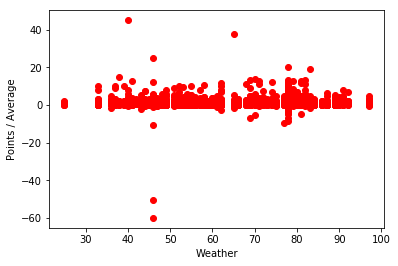

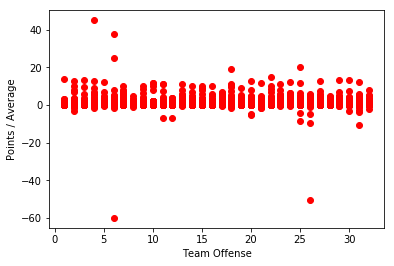

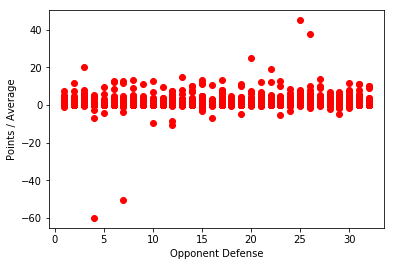

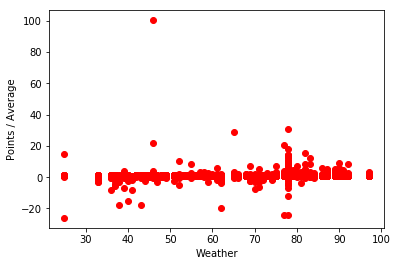

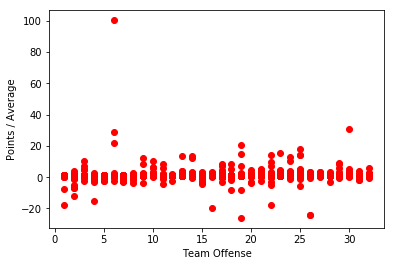

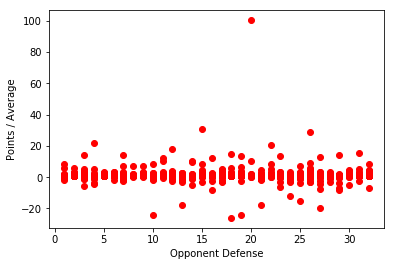

In [41]:
import matplotlib.pyplot as plt
#my x values
weather = []
team_offense = []
opp_defense = []
#my y values
actual_ratio = []
predicted_ratio = []

#print(data[1][3] / data[1][0])
for d in data:
    if(d[0] > 0):
        #tempy = (d[3] - d[0]) / d[3] * 100
        team = []

        tempy = d[4] / d[1]
        
        actual_ratio.append(tempy)
        team_offense.append(d[0])
        opp_defense.append(d[3])
        weather.append(d[2])
        
        team.append(d[0])
        team.append(d[1])
        team.append(d[2])
        team.append(d[3])
        # print(e)
        #print(team)
        team_tensor = Variable(torch.Tensor([team]))
        predicted_ratio.append(model_4.forward(team_tensor).data[0][0] / d[1])
        #print(model_4.forward(team_tensor).data[0][0]," ", test_data_answers[i+1])
        
plt.plot(weather,actual_ratio,'ro')
plt.xlabel("Weather")
plt.ylabel("Points / Average")
#plt.axis([-20, 20, 0, 10])
plt.show()

plt.plot(team_offense,actual_ratio,'ro')
plt.xlabel("Team Offense")
plt.ylabel("Points / Average")
#plt.axis([30, 60, 0, 10])
plt.show()

plt.plot(opp_defense,actual_ratio,'ro')
plt.xlabel("Opponent Defense")
plt.ylabel("Points / Average")
#plt.axis([30, 60, 0, 10])
plt.show()

plt.plot(weather,predicted_ratio,'ro')
plt.xlabel("Weather")
plt.ylabel("Points / Average")
#plt.axis([-20, 20, 0, 10])
plt.show()

plt.plot(team_offense,predicted_ratio,'ro')
plt.xlabel("Team Offense")
plt.ylabel("Points / Average")
#plt.axis([30, 60, 0, 10])
plt.show()

plt.plot(opp_defense,predicted_ratio,'ro')
plt.xlabel("Opponent Defense")
plt.ylabel("Points / Average")
#plt.axis([30, 60, 0, 10])
plt.show()


# Second Models Graphs #
only run if you trained on the second model

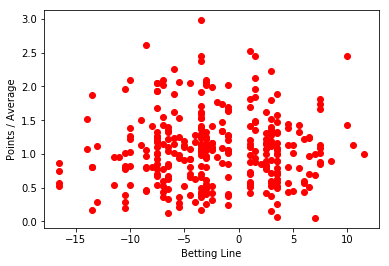

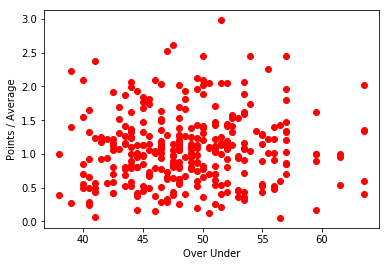

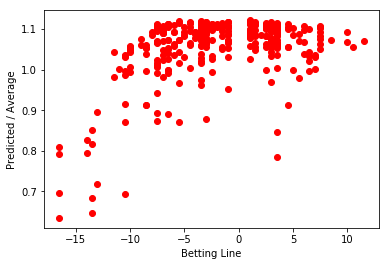

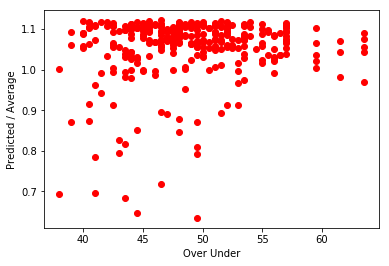

In [258]:
import matplotlib.pyplot as plt
x = []
y = []
z = []
p = []
#print(data[1][3] / data[1][0])
for d in data:
    if(d[0] > 15):
        #tempy = (d[3] - d[0]) / d[3] * 100
        team = []

        tempy = d[3] / d[0]
        y.append(tempy)
        x.append(d[1])
        z.append(d[2])
        
        team.append(d[0])
        team.append(d[1])
        team.append(d[2])
        # print(e)
        #print(team)
        team_tensor = Variable(torch.Tensor([team]))
        p.append(model_4.forward(team_tensor).data[0][0] / d[0])
        #print(model_4.forward(team_tensor).data[0][0]," ", test_data_answers[i+1])
        
plt.plot(z,y,'ro')
plt.xlabel("Betting Line")
plt.ylabel("Points / Average")
#plt.axis([-20, 20, 0, 10])
plt.show()

plt.plot(x,y,'ro')
plt.xlabel("Over Under")
plt.ylabel("Points / Average")
#plt.axis([30, 60, 0, 10])
plt.show()

plt.plot(z,p,'ro')
plt.xlabel("Betting Line")
plt.ylabel("Predicted / Average")
#plt.axis([-20, 20, 0, 10])
plt.show()

plt.plot(x,p,'ro')
plt.xlabel("Over Under")
plt.ylabel("Predicted / Average")
#plt.axis([30, 60, 0, 10])
plt.show()